Dataset Shape: (768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



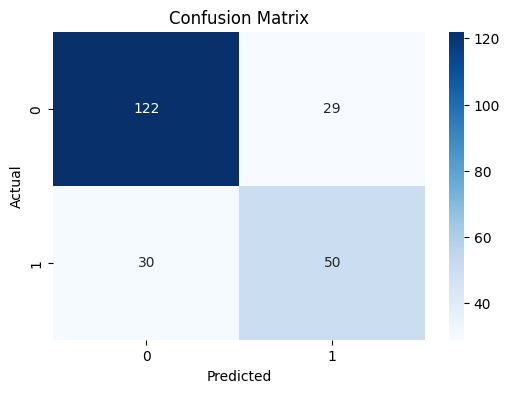

In [55]:
# 1. Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# 2. Load Dataset from Online Link
# Replace this with any online dataset link if needed
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv(url, header=None, names=col_names)
print("Dataset Shape:", data.shape)
display(data.head())

# 3. Split Features and Labels
X = data.drop('label', axis=1)
y = data['label']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train SVM Classifier
model = SVC(kernel='linear')  # You can try 'rbf', 'poly', 'sigmoid'
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
